## Step 1: Import Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


## Step 2: Load and Preprocess the Dataset

In [4]:
# Load the dataset
df = pd.read_csv('framingham.csv')

# Drop the 'education' column as it's not essential for prediction
df.drop(['education'], axis=1, inplace=True)

# Rename 'male' column for clarity
df.rename(columns={'male': 'Sex_male'}, inplace=True)

# Handle missing values by dropping rows with any null values
df.dropna(inplace=True)

# Display the distribution of the target variable
print(df['TenYearCHD'].value_counts())


TenYearCHD
0    3179
1     572
Name: count, dtype: int64


## Step 3: Feature Scaling and Data Splitting

In [5]:
# Define feature variables (X) and target variable (y)
X = df.drop('TenYearCHD', axis=1)
y = df['TenYearCHD']

# Standardize the feature variables
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42)


## Step 4: Train the Logistic Regression Model


In [6]:
# Initialize the Logistic Regression model
logreg = LogisticRegression()

# Fit the model on the training data
logreg.fit(X_train, y_train)


LogisticRegression()

## Step 5: Model Evaluation

Accuracy Score: 0.8339253996447602

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.99      0.91       938
           1       0.52      0.07      0.12       188

    accuracy                           0.83      1126
   macro avg       0.68      0.53      0.52      1126
weighted avg       0.79      0.83      0.78      1126



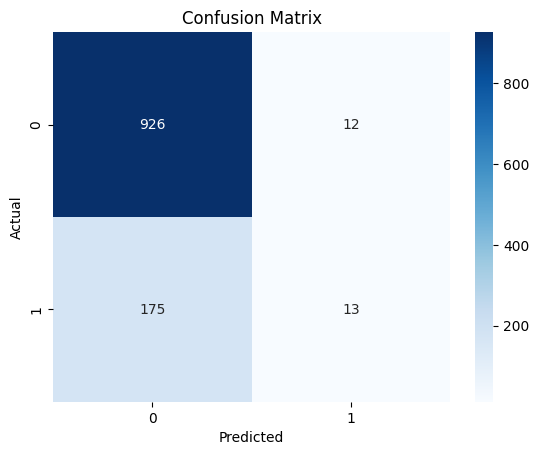

In [7]:
# Predict on the test data
y_pred = logreg.predict(X_test)

# Evaluate the model's performance
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
